In [80]:
from tbi.convert import convert
from tbi.preprocessing import preprocessing
from tbi.skull_strip import skull_strip
from tbi.segmentation import segmentation
from tbi.label_geometry_measures import label_geometry_measures
from tbi.image_intensity_stat_jac import image_intensity_stat_jac

from glob import glob
from nilearn.plotting import plot_img
from os.path import join

import os


In [67]:
dcmfiles = '/data/BR-1001/*/*/'
output = '/data/out'
mni_file = '/data/MNI152_T1_1mm_brain.nii'
atlas_file = '/data/New_atlas_cort_asym_sub.nii.gz'
template_file = '/data/TemplateYoungM_128.nii.gz'

In [ ]:
convert_dir = join(output, 'convert')
convert_args = ['-i', dcmfiles, convert_dir]
convert(convert_args)

Plotting HEAD_ROUT_5.0_H30s_2_120000.nii


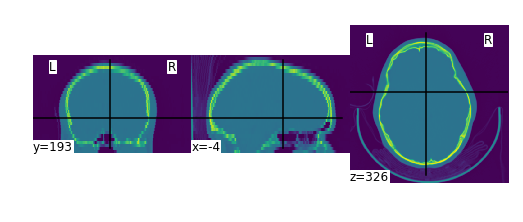

In [65]:
nii_files = os.listdir(convert_dir)

for nii_file in nii_files:
    print('Plotting {0}'.format(nii_file))
    plot_img(join(convert_dir, nii_file))

In [56]:
preprocessing_dir = join(output, 'preprocessing')
preprocessing_args = ['-i', convert_dir, '-m', mni_file, preprocessing_dir]
preprocessing(preprocessing_args)

[INFO] tbi.preprocessing :: Processing file name:HEAD_ROUT_5.0_H30s_2_120000.nii
[INFO] tbi.preprocessing :: Processing file /data/out/convert/HEAD_ROUT_5.0_H30s_2_120000.nii
[DEBUG] tbi.preprocessing :: Using temporary directory <TemporaryDirectory '/tmp/tmpo9kbwo7w'>
[INFO] tbi.preprocessing :: Saving to /data/out/preprocessing/HEAD_ROUT_5.0_H30s_2_120000


Plotting HEAD_ROUT_5.0_H30s_2_120000_normalizedInverseWarped.nii.gz
Plotting HEAD_ROUT_5.0_H30s_2_120000_normalizedWarped.nii.gz


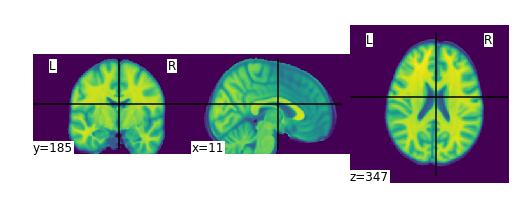

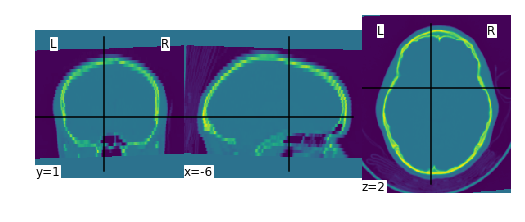

In [63]:
nii_files = os.listdir(preprocessing_dir)

for nii_file in nii_files:
    if nii_file.endswith("nii.gz"):
        print('Plotting {0}'.format(nii_file))
        plot_img(join(preprocessing_dir, nii_file))
        

In [57]:
skull_strip_dir = join(output, 'skull_strip')
skull_strip_args = ['-i', preprocessing_dir, skull_strip_dir]
skull_strip(skull_strip_args)

[INFO] tbi.skull_strip :: Arguments: Namespace(input='/data/out/preprocessing', output='/data/out/skull_strip')
[DEBUG] tbi.skull_strip :: Using R script at /workdir/tbi/skull_strip.R


Plotting HEAD_ROUT_5.0_H30s_2_120000_brain.nii.gz


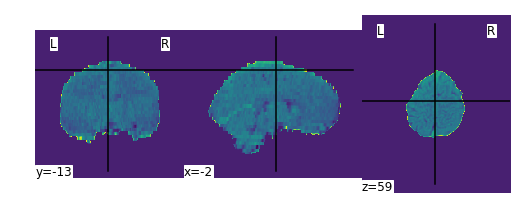

In [78]:
nii_files = os.listdir(skull_strip_dir)

for nii_file in nii_files:
    print('Plotting {0}'.format(nii_file))
    plot_img(join(skull_strip_dir, nii_file))

In [68]:
skulls = join(skull_strip_dir, '*_brain.nii.gz')
segmentation_dir = join(output, 'segmentation')
segmentation_args = ['-i', skulls, '-t', template_file, '-a', atlas_file, segmentation_dir]
segmentation(segmentation_args)

[INFO] tbi.segmentation :: Processing /data/out/skull_strip/HEAD_ROUT_5.0_H30s_2_120000_brain.nii.gz
[DEBUG] tbi.segmentation :: Output name: HEAD_ROUT_5.0_H30s_2_120000
[INFO] tbi.segmentation :: Registering /data/out/skull_strip/HEAD_ROUT_5.0_H30s_2_120000_brain.nii.gz
[INFO] tbi.segmentation :: Physical: 38.54537391662598
[INFO] tbi.segmentation :: Affine: 54.52842974662781


/data/out/segmentation/SEG/PHYSCi/HEAD_ROUT_5.0_H30s_2_120000_segmentation_cortical_phy.nii.gz
/data/out/segmentation/SEG/AFFINE/HEAD_ROUT_5.0_H30s_2_120000_segmentation_cortical_affine.nii.gz
/data/out/segmentation/REGIS/Affine2SyN/HEAD_ROUT_5.0_H30s_2_120000_preprocessed_affine2Syn1Warp.nii.gz


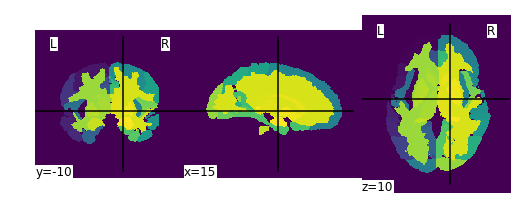

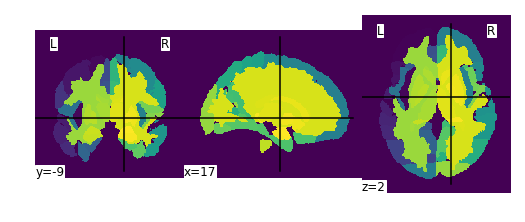

In [89]:
nii_files = glob(join(segmentation_dir, 'SEG/*/*.nii.gz'))
for nii_file in nii_files:
    print(nii_file)
    plot_img(nii_file)

In [ ]:
nii_files = glob(join(segmentation_dir, 'REGIS/Affine2SyN/*affine2Syn1Warp.nii.gz'))
for nii_file in nii_files:
    print(nii_file)
    plot_img(nii_file)


In [85]:
label_geometry_measures_dir = join(output, 'label_geometry_measures')
label_geometry_measures_args = ['-i', 
                                join(segmentation_dir, 'SEG/*/*.nii.gz'),
                                label_geometry_measures_dir
                               ]
label_geometry_measures(label_geometry_measures_args)

[DEBUG] tbi.label_geometry_measures :: Found files ['/data/out/segmentation/SEG/PHYSCi/HEAD_ROUT_5.0_H30s_2_120000_segmentation_cortical_phy.nii.gz', '/data/out/segmentation/SEG/AFFINE/HEAD_ROUT_5.0_H30s_2_120000_segmentation_cortical_affine.nii.gz']
[INFO] tbi.label_geometry_measures :: Processing file name:  /data/out/segmentation/SEG/PHYSCi/HEAD_ROUT_5.0_H30s_2_120000_segmentation_cortical_phy.nii.gz
[INFO] tbi.label_geometry_measures :: Saving to file name: /data/out/label_geometry_measures/HEAD_ROUT_5.0_H30s_2_120000_segmentation_cortical_phy.txt
[INFO] tbi.label_geometry_measures :: Processing file name:  /data/out/segmentation/SEG/AFFINE/HEAD_ROUT_5.0_H30s_2_120000_segmentation_cortical_affine.nii.gz
[INFO] tbi.label_geometry_measures :: Saving to file name: /data/out/label_geometry_measures/HEAD_ROUT_5.0_H30s_2_120000_segmentation_cortical_affine.txt


In [91]:
image_intensity_stat_jac_dir = join(output, 'image_intensity_stat_jac')

image_intensity_stat_jac_args = ['-i', 
                                 join(segmentation_dir, 'REGIS/Affine2SyN/*affine2Syn1Warp.nii.gz'), 
                                 '-t',
                                 atlas_file,
                                 image_intensity_stat_jac_dir
                                ]

image_intensity_stat_jac(image_intensity_stat_jac_args)

[DEBUG] tbi.image_intensity_stat_jac :: Found files ['/data/out/segmentation/REGIS/Affine2SyN/HEAD_ROUT_5.0_H30s_2_120000_preprocessed_affine2Syn1Warp.nii.gz']
[INFO] tbi.image_intensity_stat_jac :: Processing file name:  /data/out/segmentation/REGIS/Affine2SyN/HEAD_ROUT_5.0_H30s_2_120000_preprocessed_affine2Syn1Warp.nii.gz
[INFO] tbi.image_intensity_stat_jac :: Saving to file name: /data/out/image_intensity_stat_jac/HEAD_ROUT_5.0_H30s_2_120000_preprocessed_affine2Syn1Warp.txt
